In [1]:
using EISAnalysis

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


In [2]:
exp_circuit = 0.23r-(r-0.025wo^80)/0.2q 
ω_exp,Z_exp = exp_circuit.ω,exp_circuit.Z

fitted_circuit = r-(r-wo)/q

@time fit = EISAnalysis.fitting(fitted_circuit,ω_exp,Z_exp)

MethodError: MethodError: no method matching ~(::Circuit, ::Vector{Real})
The function `~` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  ~(::Circuit, !Matched::Vector{Float64})
   @ EISAnalysis ~/Documents/GitHub/EISAnalysis.jl/src/library.jl:145
  ~(!Matched::Bool)
   @ Base bool.jl:37
  ~(!Matched::CPE, !Matched::Vector{Float64})
   @ EISAnalysis ~/Documents/GitHub/EISAnalysis.jl/src/library.jl:135
  ...


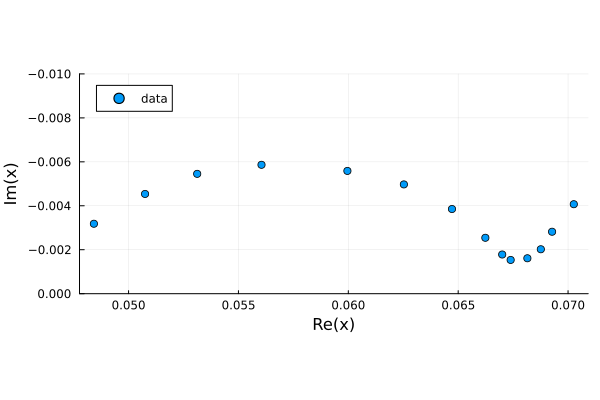

In [3]:
#Here is some raw LiB EIS data from Mendeley Data
using CSV,DataFrames,Plots
omega_data =  [ 0.05, 0.1, 0.2, 0.4, 1, 2, 4, 10, 20, 40, 100, 200, 400, 1000]
Zs = CSV.read("Data/EIS_Data.csv",DataFrame)
Z_data = Zs[!,"Re(Z)"]-im*Zs[!,"-Im(Z)"]
plt =scatter(Z_data,label = "data",aspect_ratio=:equal)
plot!(plt,ylims = (-0.01,0),yflip=true)

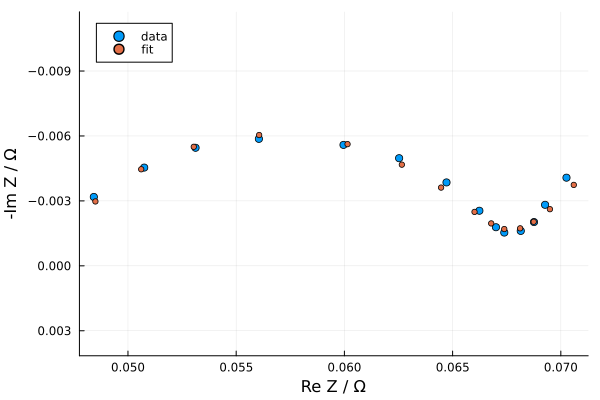

Parameters
__________
Any[:(0.045992r ~ [0.05, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0, 10.0, 20.0, 40.0, 100.0, 200.0, 400.0, 1000.0]), :(0.02137r ~ [0.05, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0, 10.0, 20.0, 40.0, 100.0, 200.0, 400.0, 1000.0]), :(0.0010652 * ws ^ 11.913 ~ [0.05, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0, 10.0, 20.0, 40.0, 100.0, 200.0, 400.0, 1000.0]), :(4.0896 * q ^ 0.65386 ~ [0.05, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0, 10.0, 20.0, 40.0, 100.0, 200.0, 400.0, 1000.0])]  1.916741 seconds (7.29 M allocations: 357.444 MiB, 1.89% gc time, 79.83% compilation time: <1% of which was recompilation)


Circuit(Real[0.05, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0, 10.0, 20.0, 40.0, 100.0, 200.0, 400.0, 1000.0], ComplexF64[0.0705990179422051 - 0.0037380401357222006im, 0.06949639844244535 - 0.0026161104249894968im, 0.06874703003287701 - 0.0020344292268780866im, 0.06812082217750837 - 0.0017313200276078348im, 0.06738650579624794 - 0.0016980675949514609im, 0.06678325944081583 - 0.001958763305936283im, 0.06601299479711371 - 0.0024898654588328857im, 0.06446830920493962 - 0.003614151625011608im, 0.06265448526734838 - 0.004673028877018775im, 0.06014521987429819 - 0.005620916241089872im, 0.05606089104550973 - 0.006042446916654209im, 0.05304065343454356 - 0.005498590638015235im, 0.050612235513573196 - 0.004459931829429622im, 0.04849550730600621 - 0.002973822575572792im], Any[:(0.045992r ~ [0.05, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0, 10.0, 20.0, 40.0, 100.0, 200.0, 400.0, 1000.0]), :(0.02137r ~ [0.05, 0.1, 0.2, 0.4, 1.0, 2.0, 4.0, 10.0, 20.0, 40.0, 100.0, 200.0, 400.0, 1000.0]), :(0.0010652 * ws ^ 11.913 ~ [0.05, 0.1

In [4]:
fitted_circuit = (0.045r-(0.03r-0.05ws^5)/5q^0.6)~omega_data
@time fit = EISAnalysis.fitting(fitted_circuit,omega_data,Z_data)

In [5]:
length(r.ω)

57